In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [44]:
#set file path
file_path = ("Resources/Chicago_Public_Schools_-_School_Progress_Reports_SY1819.csv")

In [45]:
#read in csv as a dataframe
progress_df = pd.read_csv(file_path)
progress_df.head()

,School_ID,Short_Name,Long_Name,School_Type,Primary_Category,Address,City,State,Zip,Phone,...,Attainment_SAT_Grade_11_School_Pct,Attainment_SAT_Grade_11_School_Lbl,Attainment_All_Grades_School_Pct,Attainment_All_Grades_School_Lbl,Growth_PSAT_Math_Grade_10_School_Pct,Growth_PSAT_Math_Grade_10_School_Lbl,Growth_SAT_Reading_Grade_11_School_Pct,Growth_SAT_Reading_Grade_11_School_Lbl,Growth_SAT_Math_Grade_11_School_Pct,Growth_SAT_Math_Grade_11_School_Lbl
0,609869,LANGFORD,Anna R. Langford Community Academy,Neighborhood,ES,6010 S THROOP ST,Chicago,Illinois,60636,7.735359e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,610225,WHISTLER,John Whistler Elementary School,Neighborhood,ES,11533 S ADA ST,Chicago,Illinois,60643,7.735356e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,609734,TAFT HS,William Howard Taft High School,Neighborhood,HS,6530 W BRYN MAWR AVE,Chicago,Illinois,60631,7.735341e+09,...,45.6,45.6,56.4,56.4,28.0,28th,50.0,50th,34.0,34th
3,610588,RICHARDSON,Robert J. Richardson Middle School,Neighborhood,MS,6018 S KARLOV,Chicago,Illinois,60629,7.735359e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,609894,DRAKE,John B Drake Elementary School,Neighborhood,ES,2710 S DEARBORN ST,Chicago,Illinois,60616,7.735349e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
#organize by school ID and re-index
df = progress_df.sort_values("School_ID")

In [47]:
#select only School Id, student attendance, suspensions, and teacher attendance fields (not enough data to add school facility questions)
df_select = progress_df[["School_ID", "Long_Name", "Primary_Category", "School_Type", "Student_Attendance_Year_1_Pct", "Suspensions_Per_100_Students_Year_1_Pct", "Teacher_Attendance_Year_1_Pct", "Student_Growth_Rating", "Student_Attainment_Rating"]]

In [48]:
#drop any rows with empty fields
df_select = df_select.dropna(how="any")

In [49]:
#sort by school name
df_ordered = df_select.sort_values(["Long_Name"], ascending=True)
df_ordered

,School_ID,Long_Name,Primary_Category,School_Type,Student_Attendance_Year_1_Pct,Suspensions_Per_100_Students_Year_1_Pct,Teacher_Attendance_Year_1_Pct,Student_Growth_Rating,Student_Attainment_Rating
166,610229,A.N. Pritzker School,ES,Regional gifted center,94.8,3.4,93.1,ABOVE AVERAGE,FAR ABOVE AVERAGE
374,610038,Abraham Lincoln Elementary School,ES,Neighborhood,95.8,0.1,95.5,ABOVE AVERAGE,FAR ABOVE AVERAGE
169,610281,Adam Clayton Powell Paideia Community Academy ES,ES,Neighborhood,94.5,7.1,95.2,AVERAGE,BELOW AVERAGE
207,610185,Adlai E Stevenson Elementary School,ES,Neighborhood,95.3,1.1,94.3,AVERAGE,AVERAGE
604,609993,Agustin Lara Elementary Academy,ES,Neighborhood,95.4,0.4,96.3,ABOVE AVERAGE,AVERAGE
...,...,...,...,...,...,...,...,...,...
180,610172,William T Sherman Elementary School,ES,Neighborhood,95.9,11.1,94.5,AVERAGE,BELOW AVERAGE
478,609844,William W Carter Elementary School,ES,Neighborhood,96.5,5.5,98.2,AVERAGE,AVERAGE
476,610088,Wolfgang A Mozart Elementary School,ES,Neighborhood,95.4,4.7,95.5,ABOVE AVERAGE,AVERAGE
301,609977,Woodlawn Community Elementary School,ES,Small,94.8,0.0,93.8,FAR ABOVE AVERAGE,AVERAGE


In [50]:
#reindex by new school ID order
df_indexed = df_ordered.reset_index(drop=True)
df_indexed.to_csv("resources/final_data")
df_indexed.head()

,School_ID,Long_Name,Primary_Category,School_Type,Student_Attendance_Year_1_Pct,Suspensions_Per_100_Students_Year_1_Pct,Teacher_Attendance_Year_1_Pct,Student_Growth_Rating,Student_Attainment_Rating
0,610229,A.N. Pritzker School,ES,Regional gifted center,94.8,3.4,93.1,ABOVE AVERAGE,FAR ABOVE AVERAGE
1,610038,Abraham Lincoln Elementary School,ES,Neighborhood,95.8,0.1,95.5,ABOVE AVERAGE,FAR ABOVE AVERAGE
2,610281,Adam Clayton Powell Paideia Community Academy ES,ES,Neighborhood,94.5,7.1,95.2,AVERAGE,BELOW AVERAGE
3,610185,Adlai E Stevenson Elementary School,ES,Neighborhood,95.3,1.1,94.3,AVERAGE,AVERAGE
4,609993,Agustin Lara Elementary Academy,ES,Neighborhood,95.4,0.4,96.3,ABOVE AVERAGE,AVERAGE


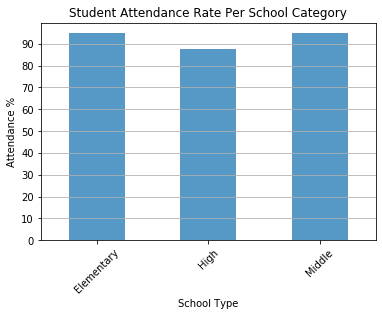

In [51]:
#attendance by school category
school_category=df_indexed.groupby(["Primary_Category"])
attendance_category=school_category["Student_Attendance_Year_1_Pct"].mean()
attendance_category=pd.DataFrame(attendance_category)

attendance_category.plot(kind="bar", legend=None, alpha=0.75)
plt.xlabel("School Type")
plt.ylabel("Attendance %")
plt.title("Student Attendance Rate Per School Category")
positions = (0, 1, 2)
labels = ("Elementary", "High", "Middle")
plt.yticks(np.arange(0, 100, step=10))
plt.grid(axis="y")
plt.xticks(positions, labels, rotation=45);


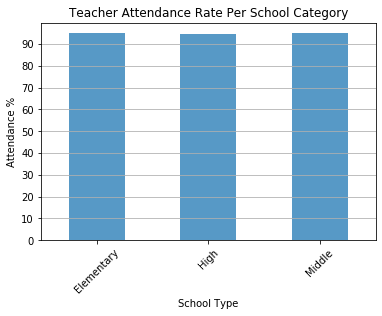

In [52]:
teacher_attendance=school_category["Teacher_Attendance_Year_1_Pct"].mean()
teacher_attendance=pd.DataFrame(teacher_attendance)

teacher_attendance.plot(kind="bar", legend=None, alpha=0.75)

plt.xlabel("School Type")
plt.ylabel("Attendance %")
plt.title("Teacher Attendance Rate Per School Category")
positions = (0, 1, 2)
labels = ("Elementary", "High", "Middle")
plt.yticks(np.arange(0, 100, step=10))
plt.grid(axis="y")
plt.xticks(positions, labels, rotation=45);

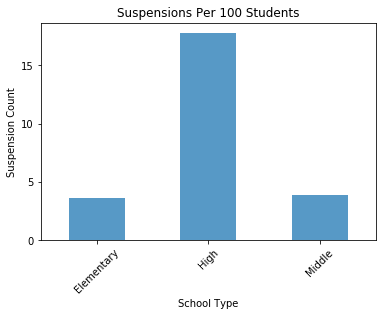

In [53]:
suspensions=school_category["Suspensions_Per_100_Students_Year_1_Pct"].mean()
suspensions=pd.DataFrame(suspensions)

suspensions.plot(kind="bar", legend=None, alpha=0.75)
plt.xlabel("School Type")
plt.ylabel("Suspension Count")
plt.title("Suspensions Per 100 Students")
positions = (0, 1, 2)
labels = ("Elementary", "High", "Middle")
plt.yticks(np.arange(0, 20, step=5))
# plt.grid(axis="y")
plt.xticks(positions, labels, rotation=45);
